# Spectral

This notebook illustrates the spectral embedding of a graph by the [spectral decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#module-sknetwork.embedding) of the Laplacian.

In [38]:

import sknetwork as skn

## Undirected graphs

**Loading**

In [39]:
adjacency, labels = skn.toy_graphs.karate_club(return_labels=True)
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Embedding**

In [40]:
spectral = skn.embedding.Spectral()
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, scaling='multiply', solver=LanczosEig(which='SM'))

In [41]:
embedding = spectral.embedding_
embedding.shape

(34, 2)

**Visualization**

In [42]:
from networkx import from_scipy_sparse_matrix, draw

In [43]:
graph = from_scipy_sparse_matrix(adjacency)

In [44]:
colors = ['r', 'b']

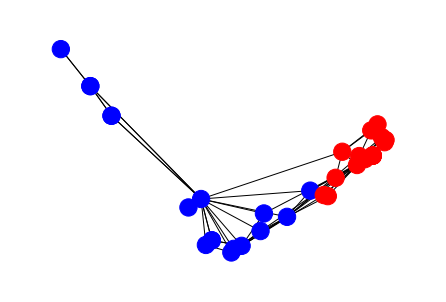

In [45]:
draw(graph, pos=embedding, node_color=[colors[l] for l in labels])

**Metrics**

In [46]:
skn.embedding.dot_modularity(adjacency, embedding)

0.6457200205173321

**Parameters**

In [47]:
# embedding dimension
spectral = skn.embedding.Spectral(embedding_dimension=10)
spectral.fit(adjacency)

Spectral(embedding_dimension=10, normalized_laplacian=True, regularization=0.01, scaling='multiply', solver=LanczosEig(which='SM'))

In [48]:
# regularization
spectral = skn.embedding.Spectral(regularization=1)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=1, scaling='multiply', solver=LanczosEig(which='SM'))

In [49]:
# regular Laplacian
spectral = skn.embedding.Spectral(normalized_laplacian=False)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=False, regularization=0.01, scaling='multiply', solver=LanczosEig(which='SM'))

In [50]:
# solver
spectral = skn.embedding.Spectral(solver='halko')
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, scaling='multiply', solver=HalkoEig(which='SM', n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False))

## Directed graphs

**Loading**

In [51]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Embedding**

In [52]:
# embedding of the graph considered as bipartite (each node considered twice)
spectral = skn.embedding.Spectral()
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, scaling='multiply', solver=LanczosEig(which='SM'))

In [53]:
embedding = spectral.embedding_
embedding.shape

(14, 2)

**Visualization**

In [54]:
from networkx import DiGraph

In [55]:
graph = from_scipy_sparse_matrix(adjacency, create_using=DiGraph())

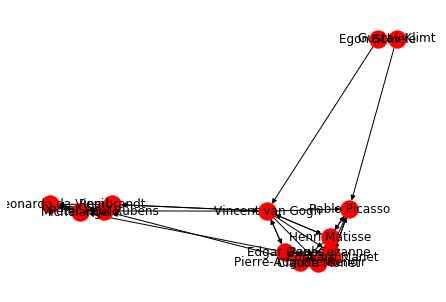

In [56]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos=embedding, node_color='r', labels = names)

**Metrics**

In [57]:
skn.embedding.dot_modularity(adjacency, embedding)

0.4568905762446217

## Bipartite graphs

**Loading**

In [58]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Embedding**

In [59]:
spectral = skn.embedding.Spectral()
spectral.fit(biadjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, scaling='multiply', solver=LanczosEig(which='SM'))

In [60]:
embedding = spectral.embedding_
embedding.shape

(15, 2)

In [61]:
coembedding = spectral.coembedding_
coembedding.shape

(16, 2)

**Visualization**

In [62]:

adjacency = skn.utils.bipartite2undirected(biadjacency)

In [63]:
graph = from_scipy_sparse_matrix(adjacency)

In [64]:
n1, n2 = biadjacency.shape
pos = {i: embedding[i, :] for i in range(n1)} 
pos.update({n1 + i: coembedding[i, :] for i in range(n2)})

In [65]:
colors = n1 * ['r'] + n2 * ['b']

In [66]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

In [ ]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=colors, labels=names, edge_color='grey')



